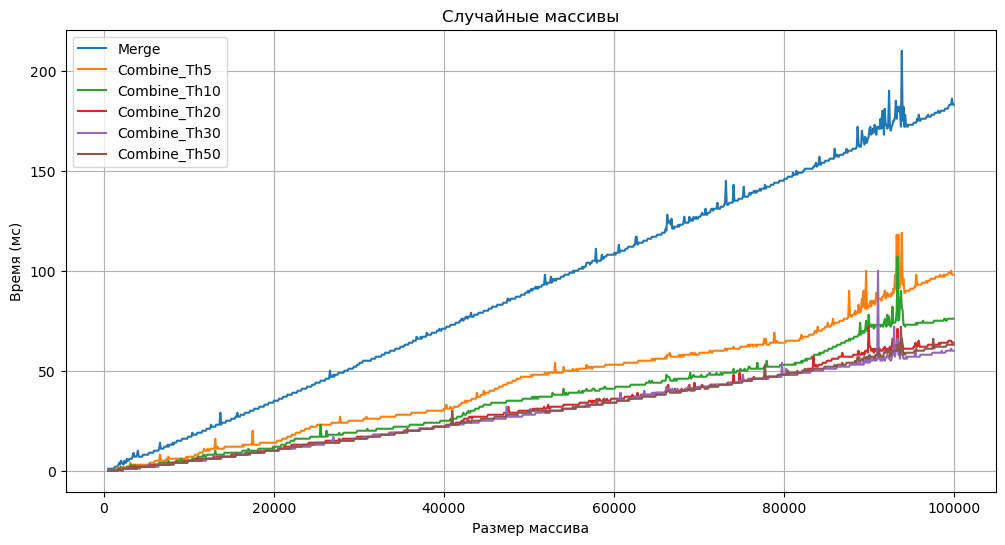

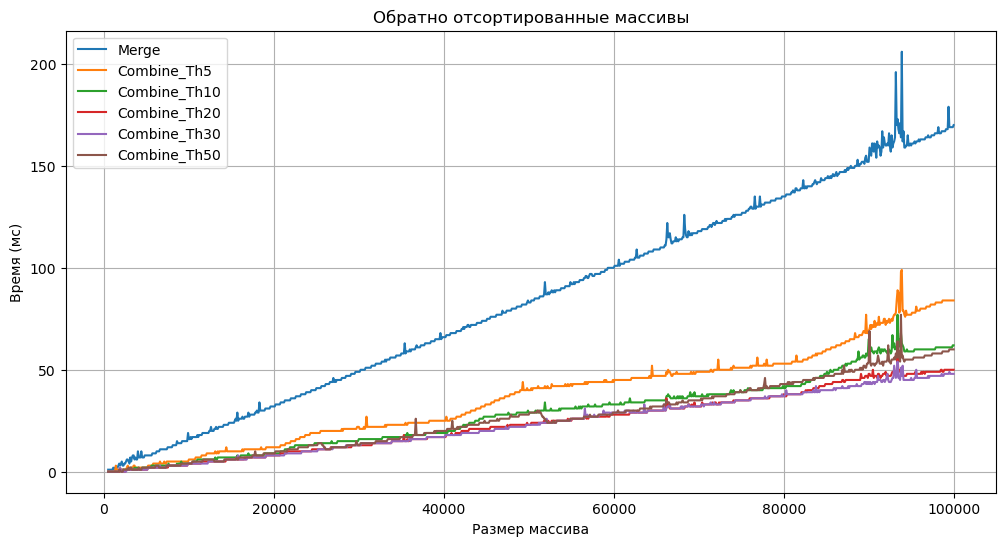

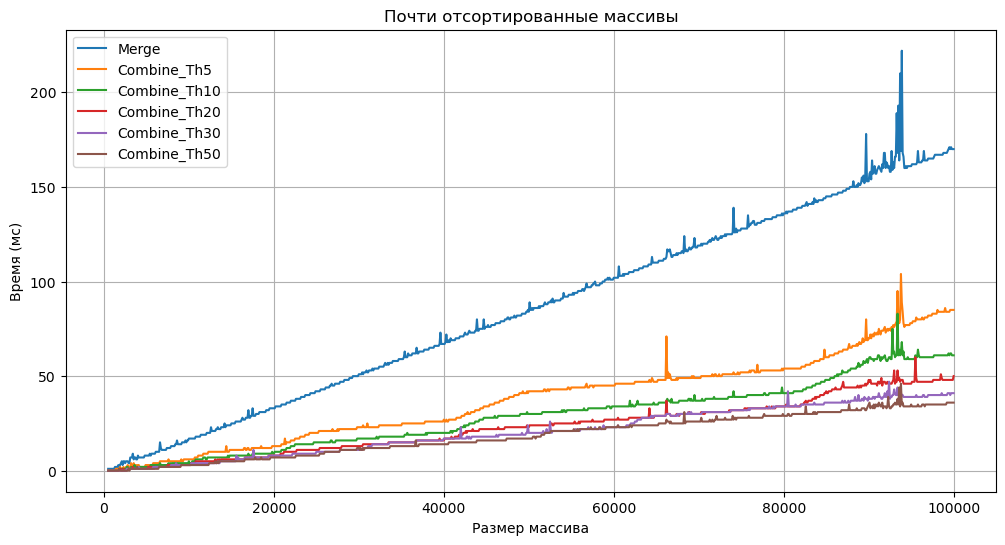


Случайные массивы:
  Combine_Th30: 29.19 мс в среднем
  Combine_Th50: 29.49 мс в среднем
  Combine_Th20: 30.44 мс в среднем

Обратно отсортированные массивы:
  Combine_Th30: 23.17 мс в среднем
  Combine_Th20: 23.68 мс в среднем
  Combine_Th50: 26.39 мс в среднем

Почти отсортированные массивы:
  Combine_Th50: 18.37 мс в среднем
  Combine_Th30: 20.71 мс в среднем
  Combine_Th20: 22.97 мс в среднем

Случайные массивы:
  Гибридный алгоритм быстрее на 69.9% в среднем

Обратно отсортированные массивы:
  Гибридный алгоритм быстрее на 74.3% в среднем

Почти отсортированные массивы:
  Гибридный алгоритм быстрее на 79.7% в среднем


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
 
ar_df = pd.read_csv('ar.csv')
rev_df = pd.read_csv('revAr.csv')
al_df = pd.read_csv('alAr.csv')

def plot_comparison(df, title):
    plt.figure(figsize=(12, 6))
    
    for column in df.columns[1:]:
        plt.plot(df['Size'], df[column], label=column)
    
    plt.xlabel('Размер массива')
    plt.ylabel('Время (мс)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()
 
plot_comparison(ar_df, 'Случайные массивы')
plot_comparison(rev_df, 'Обратно отсортированные массивы')
plot_comparison(al_df, 'Почти отсортированные массивы')
 
def find_best_threshold(df, title):
    threshold_cols = [col for col in df.columns if 'Th' in col]
    
    best_times = []
    for threshold in threshold_cols:
        avg_time = df[threshold].mean()
        best_times.append((threshold, avg_time))
    
    best_times.sort(key=lambda x: x[1])
    
    print(f"\n{title}:")
    for threshold, time in best_times[:3]:
        print(f"  {threshold}: {time:.2f} мс в среднем")
 
find_best_threshold(ar_df, "Случайные массивы")
find_best_threshold(rev_df, "Обратно отсортированные массивы")
find_best_threshold(al_df, "Почти отсортированные массивы")
 
def compare_standard_vs_best(df, title):
    standard_times = df['Merge']
    threshold_cols = [col for col in df.columns if 'Th' in col]
    best_hybrid_times = df[threshold_cols].min(axis=1)
    improvement = ((standard_times - best_hybrid_times) / standard_times * 100).mean()
    
    print(f"\n{title}:")
    print(f"  Гибридный алгоритм быстрее на {improvement:.1f}% в среднем")
 
compare_standard_vs_best(ar_df, "Случайные массивы")
compare_standard_vs_best(rev_df, "Обратно отсортированные массивы")
compare_standard_vs_best(al_df, "Почти отсортированные массивы")